In [30]:
import pandas as pd
data = pd.read_csv("US_Accidents_May19.csv")

In [31]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


### As we can see, we have a lot of null values which needs to be removed. There are null values in almost every row, so removing them means data left with not much values. Thus we will remove columns with null values.

In [32]:
d = data.dropna(axis = 1)

In [33]:
d

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,I-70 E,R,...,False,False,False,False,False,False,False,False,False,False
1,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Brice Rd,L,...,False,False,False,False,False,False,False,False,False,False
2,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,State Route 32,R,...,False,False,False,False,False,False,False,False,True,False
3,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,I-75 S,R,...,False,False,False,False,False,False,False,False,False,False
4,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243934,A-2243935,Bing,2,2017-08-30 20:01:40,2017-08-31 02:01:40,34.055160,-118.214070,0.212,San Bernardino Fwy E,R,...,False,False,False,False,False,False,False,False,False,False
2243935,A-2243936,Bing,2,2017-08-30 20:01:40,2017-08-31 02:01:40,34.046740,-118.214800,0.583,I-5 N,R,...,False,False,False,False,False,False,False,False,False,False
2243936,A-2243937,Bing,3,2017-08-30 20:03:10,2017-08-31 02:03:10,34.031850,-117.135910,1.216,I-10 E,R,...,False,True,False,False,False,False,False,False,False,False
2243937,A-2243938,Bing,4,2017-08-30 20:49:40,2017-08-31 02:49:40,34.277860,-118.608280,1.991,Ronald Reagan Fwy W,R,...,False,False,False,False,False,False,False,False,False,False


### Now, since the null values have been removed. We can do our analysis. 


### After that, now we shall check which all columns have categorical data

In [34]:
cols = d.columns
numerical_cols = d._get_numeric_data().columns
categorical_cols = list(set(cols) - set(numerical_cols))
categorical_cols

['ID',
 'End_Time',
 'Country',
 'Source',
 'Street',
 'Side',
 'Start_Time',
 'State',
 'County']

### So these are the categorical columns present. Now we shall analyze them on by one.

### We see that there are some unnecessary variables like Side ( Shows the relative side of the street (Right/Left) in address field) which doesn't give much information regarding accidents. So we remove it. And since all the accidents recorded in this dataset has occured in US only, the Country variable should also be removed as well.

In [35]:
d= d.drop(columns = ['Side', 'Country'])

### We shall first check the state-wise distribution of the accidents.

In [42]:
groupby_state = d.groupby('State')['ID'].count()

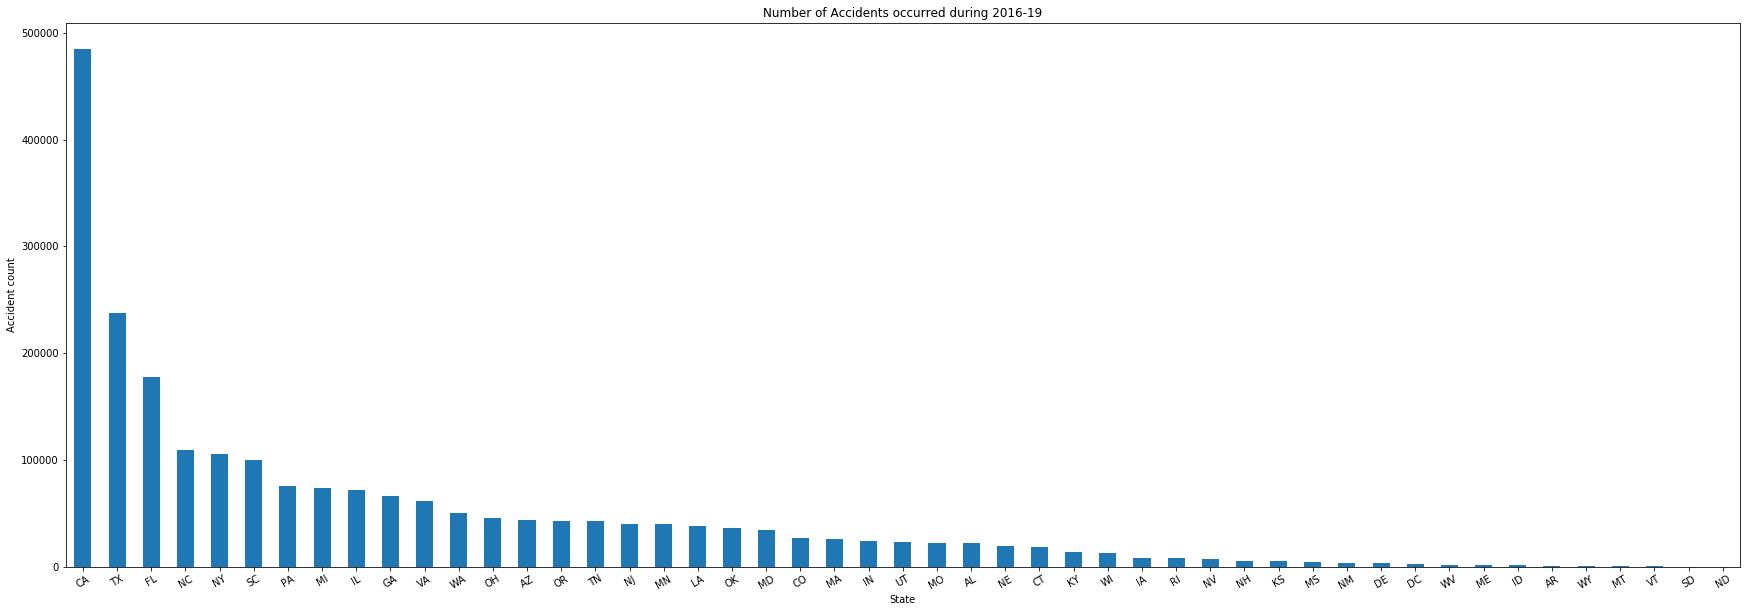

In [56]:
import matplotlib.pyplot as plt

# State_cat = list(d['State'].unique())
# State_freq = d.State.value_counts()
plt.figure(figsize=(30,10))
groupby_state.plot.bar(rot = 30, title = "Number of Accidents occurred during 2016-19")
plt.ylabel("Accident count")
plt.show(block = True)

### In order to understand it better, we will sort the values and then plot it again. 

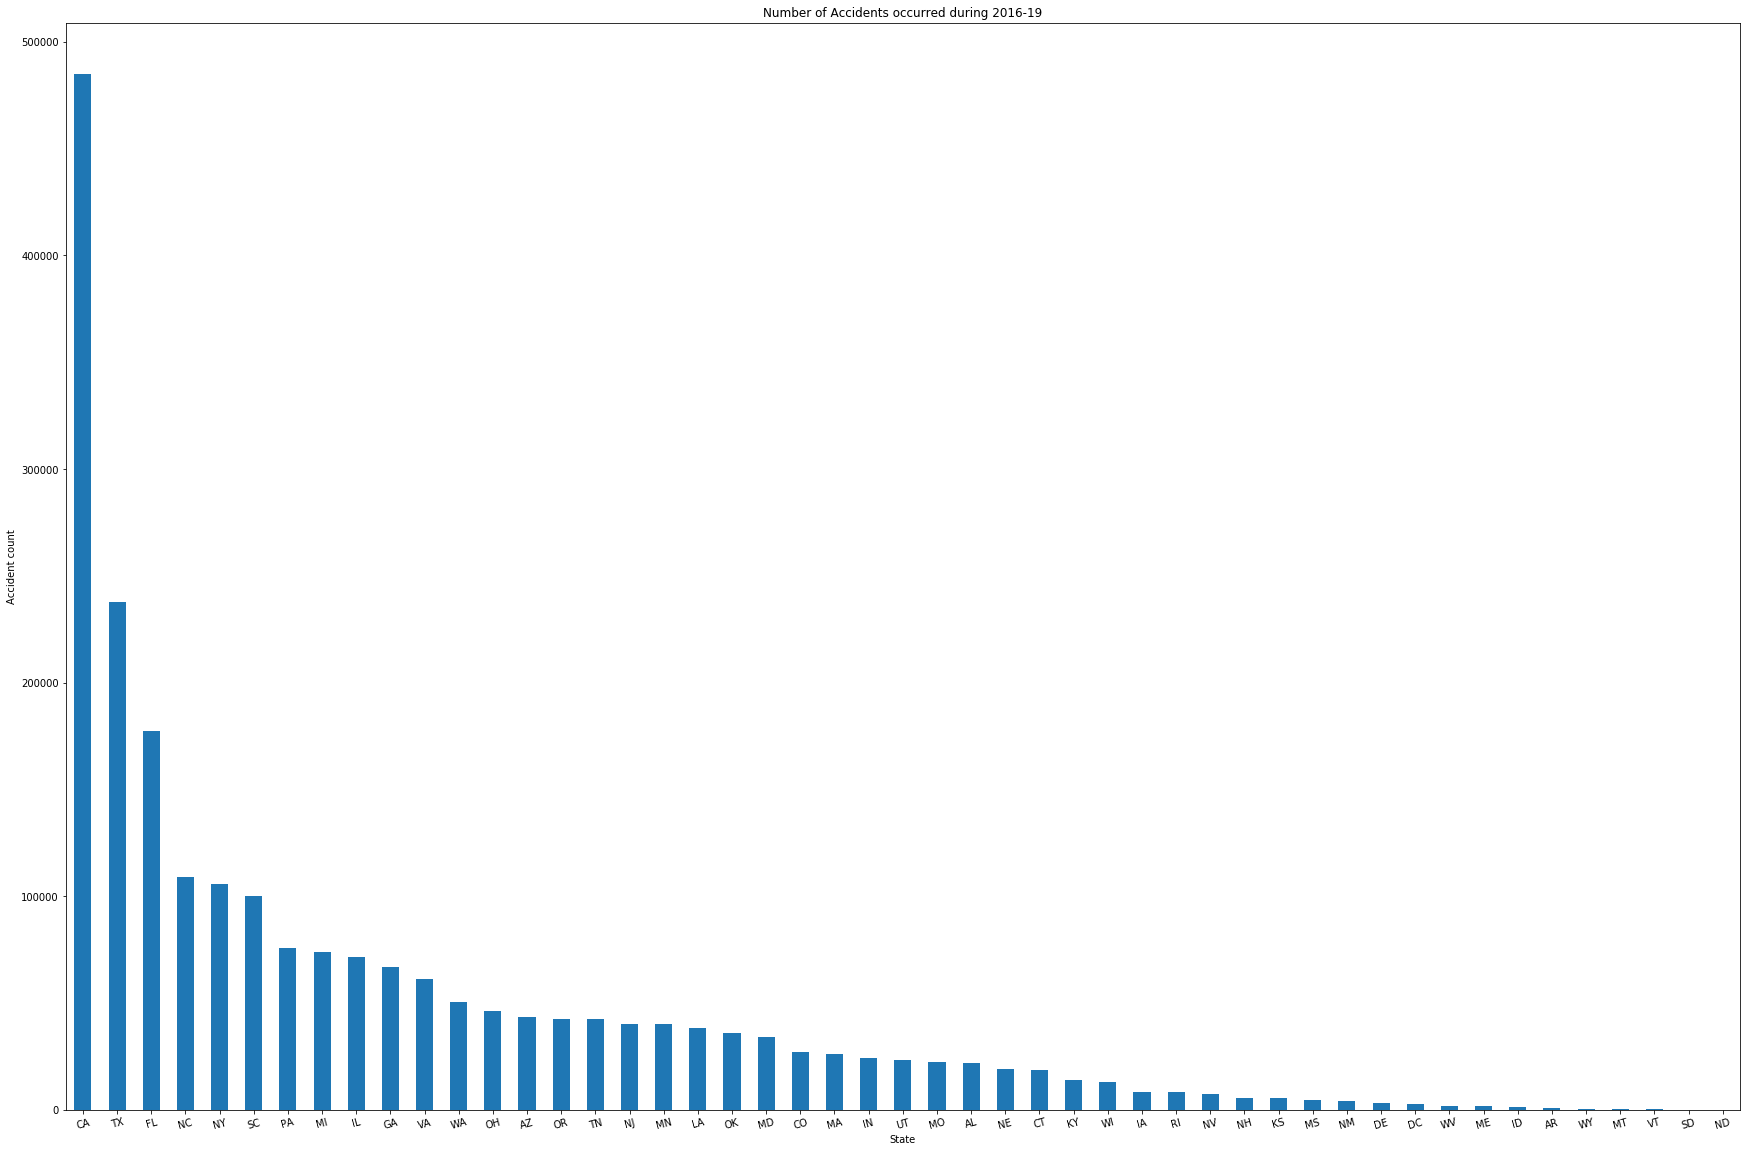

In [57]:
groupby_state = groupby_state.sort_values(ascending = False)
plt.figure(figsize=(30,20))
groupby_state.plot.bar(rot = 15, title = "Number of Accidents occurred during 2016-19")
plt.ylabel("Accident count")
plt.show(block = True)

### As we can see, most number of accidents has been recorded in California whereas North Dakota has got the least number of accidents. Definitely something might be wrong in the roadways or traffic management which needs to be looked after.